In [1]:
import pandas as pd
import numpy as np

In [2]:
from datasets import load_dataset

ds = load_dataset("Jsevisal/go_emotions_wheel")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [4]:
df = ds['train'].to_pandas()

In [5]:
df

,text,labels,id
0,My favourite food is anything I didn't have to...,[5],eebbqej
1,"Now if he does off himself, everyone will thin...",[5],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[7],eezlygj
3,To make her feel threatened,[2],ed7ypvh
4,Dirty Southern Wankers,[7],ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[0],edsb738
43406,Always thought that was funny but is it a refe...,[3],ee7fdou
43407,What are you talking about? Anything bad that ...,[7],efgbhks
43408,"More like a baptism, with sexy results!",[0],ed1naf8


In [12]:
import spacy

In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
docs = list(nlp.pipe(df['text']))

In [21]:
token_lists = [[token.text for token in doc] for doc in docs]

In [25]:
token_counts = [len([t for t in doc if not t.is_punct and not t.is_space]) for doc in docs]

In [34]:
min_idx = token_counts.index(min(token_counts))
print(f"Renglón con MENOS tokens: {df['text'].iloc[min_idx]}")

Renglón con MENOS tokens: :((


In [35]:
max_idx = token_counts.index(max(token_counts))
print(f"Renglón con MÁS tokens: {df['text'].iloc[max_idx]}")

Renglón con MÁS tokens: For your kindness to mobile users I give a platinum ⠀⠀⠀⠀⠀⣤⣶⣶⡶⠦⠴⠶⠶⠶⠶⡶⠶⠦⠶⠶⠶⠶⠶⠶⠶⣄⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⣿⣀⣀⣀⣀⠀⢀⣤⠄⠀⠀⣶⢤⣄⠀⠀⠀⣤⣤⣄⣿⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠿⣿⣿⣿⣿⡷⠋⠁⠀⠀⠀⠙⠢⠙⠻⣿⡿⠿⠿⠫⠋⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⢀⣤⠞⠉⠀⠀⠀⠀⣴⣶⣄⠀⠀⠀⢀⣕⠦⣀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⢀⣤⠾⠋⠁⠀⠀⠀⠀⢀⣼⣿⠟⢿⣆⠀⢠⡟⠉⠉⠊⠳⢤⣀⠀⠀⠀ ⠀⣠⡾⠛⠁⠀⠀⠀⠀⠀⢀⣀⣾⣿⠃⠀⡀⠹⣧⣘⠀⠀⠀⠀⠀⠀⠉⠳⢤⡀ ⠀⣿⡀⠀⠀⢠⣶⣶⣿⣿⣿⣿⡿⠁⠀⣼⠃⠀⢹⣿⣿⣿⣶⣶⣤⠀⠀⠀⢰⣷ ⠀⢿⣇⠀⠀⠈⠻⡟⠛⠋⠉⠉⠀⠀⡼⠃⠀⢠⣿⠋⠉⠉⠛⠛⠋⠀⢀⢀⣿⡏ ⠀⠘⣿⡄⠀⠀⠀⠈⠢⡀⠀⠀⠀⡼⠁⠀⢠⣿⠇⠀⠀⡀⠀⠀⠀⠀⡜⣼⡿⠀ ⠀⠀⢻⣷⠀⠀⠀⠀⠀⢸⡄⠀⢰⠃⠀⠀⣾⡟⠀⠀⠸⡇⠀⠀⠀⢰⢧⣿⠃⠀ ⠀⠀⠘⣿⣇⠀⠀⠀⠀⣿⠇⠀⠇⠀⠀⣼⠟⠀⠀⠀⠀⣇⠀⠀⢀⡟⣾⡟⠀⠀ ⠀⠀⠀⢹⣿⡄⠀⠀⠀⣿⠀⣀⣠⠴⠚⠛⠶⣤⣀⠀⠀⢻⠀⢀⡾⣹⣿⠃⠀⠀ ⠀⠀⠀⠀⢿⣷⠀⠀⠀⠙⠊⠁⠀⢠⡆⠀⠀⠀⠉⠛⠓⠋⠀⠸⢣⣿⠏⠀⠀⠀ ⠀⠀⠀⠀⠘⣿⣷⣦⣤⣤⣄⣀⣀⣿⣤⣤⣤⣤⣤⣄⣀⣀⣀⣀⣾⡟⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⢹⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠃


In [38]:
from collections import Counter

unigrams = [
    token.text.lower() for doc in docs for token in doc 
    if not token.is_stop and not token.is_punct and not token.is_space
]

unigram_counts = Counter(unigrams)

In [39]:
noun_chunks = [chunk.text.lower() for doc in docs for chunk in doc.noun_chunks]
noun_chunk_counts = Counter(noun_chunks)

In [46]:
print(f'Unigramas más comunes: {unigram_counts.most_common(1)}')

Unigramas más comunes: [('like', 3273)]


In [47]:
print(f'NOUN CHUNKS más comunes: {noun_chunk_counts.most_common(1)}')

NOUN CHUNKS más comunes: [('i', 20950)]


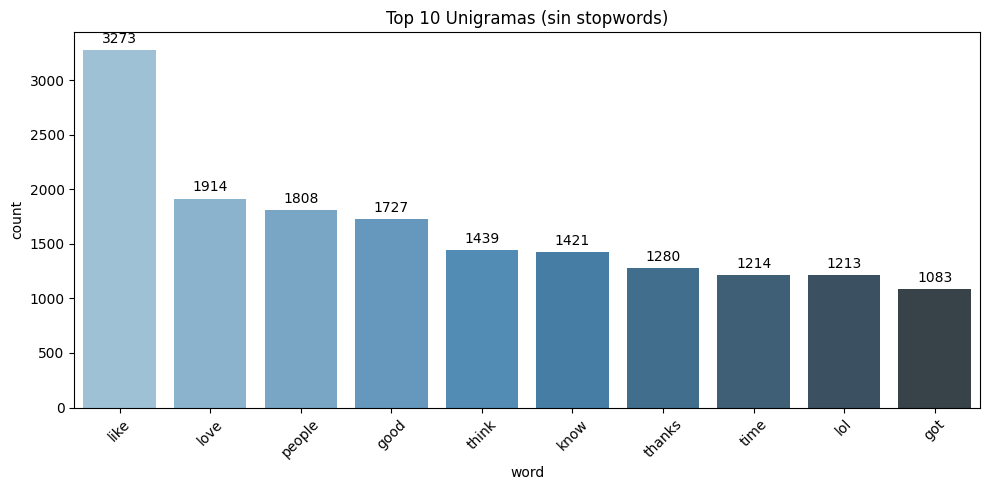

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con los top unigramas
top_uni = unigram_counts.most_common(10)
df_plot = pd.DataFrame(top_uni, columns=["word", "count"])

# Crear gráfica
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_plot, x="word", y="count", palette="Blues_d", hue="word")

# Agregar los valores encima de las barras (a todo el BarContainer)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Estética
plt.title("Top 10 Unigramas (sin stopwords)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


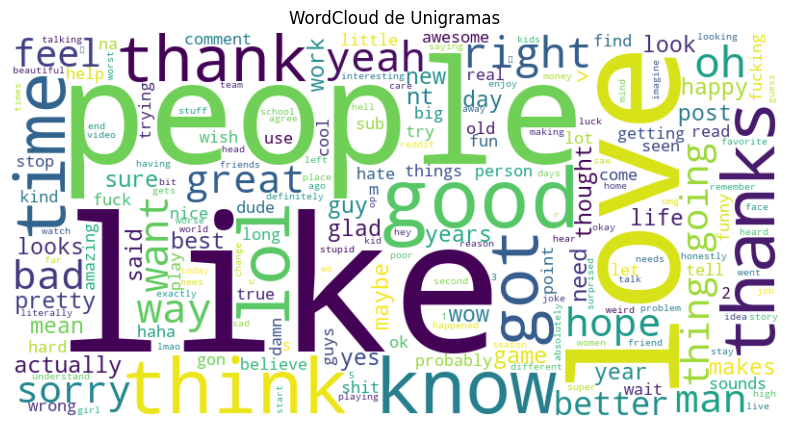

In [57]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unigram_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de Unigramas")
plt.show()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsrikanthnani/human-emotions-wheel-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/studio-lab-user/.cache/kagglehub/datasets/iamsrikanthnani/human-emotions-wheel-dataset/versions/1


In [7]:
import json

with open(os.path.join(path, "emotions.json"), "r") as f:
    data = json.load(f)

In [12]:
secondary_list = []

for primary in data:
    for secondary in primary.get("secondary", []):
        secondary_list.append({
            "parent": primary["feeling"],
            "feeling": secondary["feeling"],
            "description": secondary["description"],
            "intensity": secondary["intensity"],
            "category": secondary["category"],
            "example": secondary["example_scenario"],
            "synonyms": ", ".join(secondary["synonyms"]),
            "antonyms": ", ".join(secondary["antonyms"]),
        })

df_kaggle = pd.DataFrame(secondary_list)
df_kaggle.head()

,parent,feeling,description,intensity,category,example,synonyms,antonyms
0,Happy,Playful,Feeling lighthearted and inclined to engage in...,3,Positive,Teasing a friend during a lighthearted game ni...,"Fun-loving, Whimsical, Jovial","Serious, Stern, Rigid"
1,Happy,Content,A state of calm satisfaction and peace with on...,3,Positive,Sitting by a fireplace with a good book on a r...,"Satisfied, At ease, Fulfilled","Restless, Dissatisfied, Uneasy"
2,Happy,Interested,"Feeling curious or engaged, with a desire to l...",3,Positive,Listening intently to a lecture on a favorite ...,"Engaged, Fascinated, Intrigued","Bored, Disinterested, Apathetic"
3,Happy,Proud,Feeling a deep sense of satisfaction or achiev...,4,Positive,Watching a child graduate after years of support.,"Satisfied, Accomplished, Pleased","Ashamed, Disappointed, Embarrassed"
4,Happy,Accepted,"Feeling recognized and valued by others, often...",4,Positive,Being warmly welcomed into a new community group.,"Welcomed, Included, Appreciated","Rejected, Excluded, Ignored"


In [13]:
df_kaggle.sample()

,parent,feeling,description,intensity,category,example,synonyms,antonyms
16,Angry,Humiliated,"Feeling degraded or shamed, often due to publi...",5,Negative,Being publicly criticized by a boss in front o...,"Shamed, Mortified, Degraded","Respected, Honored, Dignified"


In [14]:
df_kaggle.tail()

,parent,feeling,description,intensity,category,example,synonyms,antonyms
32,Bad,Tired,"Feeling physically or mentally exhausted, ofte...",4,Negative,Feeling drained after a long day of work.,"Exhausted, Fatigued, Weary","Energized, Rested, Refreshed"
33,Disgust,Disapproving,Feeling critical or negative toward something ...,3,Negative,Frowning at someone’s rude behavior in public.,"Critical, Judgmental, Displeased","Approving, Accepting, Pleased"
34,Disgust,Disappointed,Feeling let down or repelled by something that...,4,Negative,Seeing a once-respected leader behave unethica...,"Let down, Dissatisfied, Disheartened","Satisfied, Pleased, Fulfilled"
35,Disgust,Awful,Feeling a strong sense of distaste or horror t...,5,Negative,Seeing a graphic scene of violence on the news.,"Horrible, Terrible, Dreadful","Wonderful, Pleasant, Delightful"
36,Disgust,Repelled,Feeling strongly pushed away or repulsed by so...,4,Negative,Walking away from a pile of garbage on the str...,"Repulsed, Averse, Disgusted","Attracted, Drawn, Pleased"


In [15]:
df_kaggle.isna().sum()

parent         0
feeling        0
description    0
intensity      0
category       0
example        0
synonyms       0
antonyms       0
dtype: int64